![](https://raw.githubusercontent.com/Edward-Beck/dsc-3-final-project-online-ds-pt-100118/master/pictures/Opening_Pic.png)

In [52]:
#General Libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image  

#Statical Libraries
import statsmodels.discrete.discrete_model as sm
from scipy import stats

#Data Processing
from sklearn.model_selection import train_test_split
from patsy import dmatrices
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from sklearn.preprocessing import StandardScaler
import timeit

#Data Analysis
from sklearn import metrics, preprocessing
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.metrics import roc_curve, auc ,accuracy_score ,f1_score, precision_score 
from sklearn.metrics import classification_report ,mean_squared_error as mse ,r2_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE 
import shap

#Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import svm

In [53]:
#Raw Data Set
df = pd.read_csv('credit_train.csv')
print(df.shape)
df.head(10)


(100514, 19)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [54]:
# These Columns do not have any relevance to the analysis being performed 
df = df.drop(['Loan ID'],axis =1)
df = df.drop(['Customer ID'],axis =1)

In [55]:
#Data Exploration 
df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [56]:
#Checking For Null Values
for key, value in df.iteritems(): 
    print(key, value.isnull().sum()) 

Loan Status 514
Current Loan Amount 514
Term 514
Credit Score 19668
Annual Income 19668
Years in current job 4736
Home Ownership 514
Purpose 514
Monthly Debt 514
Years of Credit History 514
Months since last delinquent 53655
Number of Open Accounts 514
Number of Credit Problems 514
Current Credit Balance 514
Maximum Open Credit 516
Bankruptcies 718
Tax Liens 524


In [57]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [58]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [59]:
#Cleaning Data the easy way

df.dropna(axis=0, inplace = True)
df.shape

(36423, 17)

In [60]:
df['Loan Status'].value_counts()

Fully Paid     28972
Charged Off     7451
Name: Loan Status, dtype: int64

In [61]:
#View the disturbion 
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,3.642300e+04,36423.000000,3.642300e+04,36423.000000,36423.000000,36423.000000,36423.000000,36423.000000,3.642300e+04,3.642300e+04,36423.000000,36423.000000
mean,1.377581e+07,1055.688905,1.464561e+06,19269.251544,19.065000,34.851358,11.490816,0.186036,2.636261e+05,6.651413e+05,0.114790,0.038575
std,3.406789e+07,1438.252560,9.357681e+05,12100.926465,6.654911,21.916600,4.991626,0.528248,3.176197e+05,5.703167e+06,0.359648,0.298938
min,2.145000e+04,585.000000,1.112450e+05,0.000000,3.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.907840e+05,702.000000,9.309050e+05,11125.735000,14.500000,16.000000,8.000000,0.000000,1.010515e+05,2.472910e+05,0.000000,0.000000
50%,3.247200e+05,721.000000,1.260498e+06,17117.480000,17.700000,31.000000,11.000000,0.000000,1.869600e+05,4.214760e+05,0.000000,0.000000
75%,5.421900e+05,738.000000,1.742766e+06,24766.120000,22.400000,51.000000,14.000000,0.000000,3.284340e+05,7.029660e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,3.083900e+07,229057.920000,70.500000,176.000000,48.000000,15.000000,7.350321e+06,7.982554e+08,7.000000,15.000000


In [62]:
#Check For Null Values
for key, value in df.iteritems():
    print(key, value.isnull().sum()) 
    

Loan Status 0
Current Loan Amount 0
Term 0
Credit Score 0
Annual Income 0
Years in current job 0
Home Ownership 0
Purpose 0
Monthly Debt 0
Years of Credit History 0
Months since last delinquent 0
Number of Open Accounts 0
Number of Credit Problems 0
Current Credit Balance 0
Maximum Open Credit 0
Bankruptcies 0
Tax Liens 0


In [63]:
# Turning Categorical Variables into numerical values 
label_encoder = LabelEncoder()
label_encoder.fit(df['Loan Status'])
#Fully Paid = 1, Charged Off = 0 
df['Loan Status'] = label_encoder.transform(df['Loan Status'])
label_encoder = LabelEncoder()
label_encoder.fit(df['Term'])
# Value = Number of Years on Loan
df['Term'] = label_encoder.transform(df['Term'])

label_encoder = LabelEncoder()
label_encoder.fit(df['Years in current job' ])
# Value = Number of years in job, zero if less than one year
df['Years in current job' ] = label_encoder.transform(df['Years in current job' ])
#Had to switch the years around
df['Years in current job' ].replace(to_replace = 1, value= 22, inplace = True)
df['Years in current job' ].replace(to_replace = 10, value= 33, inplace = True)
df['Years in current job' ].replace(to_replace = 22, value= 10, inplace = True)
df['Years in current job' ].replace(to_replace = 33, value= 1, inplace = True)
label_encoder = LabelEncoder()
label_encoder.fit(df['Home Ownership' ])

# 1 = 'Home Mortgage' , 2 = 'Rent' , 3 = 'Own Home' , 4 = 'HaveMortgage'
df['Home Ownership' ] = label_encoder.transform(df['Home Ownership' ])
label_encoder = LabelEncoder()
label_encoder.fit(df['Purpose' ])
# 5= 'Home Improvements', 3 ='Debt Consolidation', 1 ='Buy House', 11 ='other',
# 0 ='Business Loan',  2 = 'Buy a Car', 9 = 'major_purchase', 8 ='Take a Trip',
# 7 ='Other', 13 = 'small_business', 6 = 'Medical Bills', 15 ='wedding', 14 ='vacation',
# 4='Educational Expenses', 10 ='moving', 12 ='renewable_energy'
df['Purpose' ] = label_encoder.transform(df['Purpose' ])


![](https://raw.githubusercontent.com/Edward-Beck/dsc-3-final-project-online-ds-pt-100118/master/pictures/Data_Analysis.png)

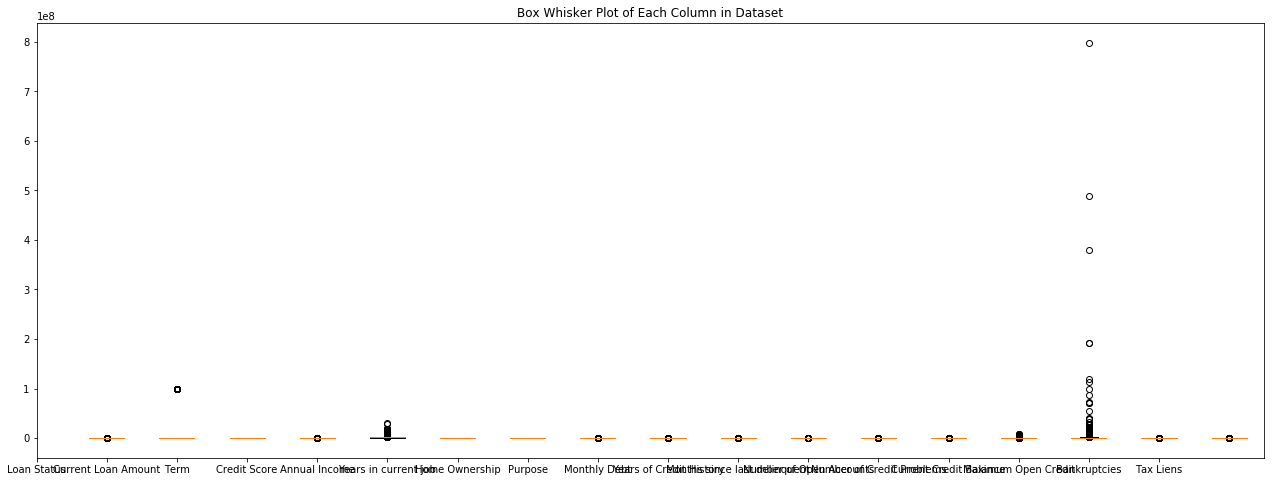

In [64]:
# Create a Box Whisker Plot of each column
plt.figure(figsize=(22, 8))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box Whisker Plot of Each Column in Dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values)
plt.show()



In [65]:
#Covariance Table
def covariance(df):
    for col in df.columns:
        df[col] = np.round((df[col]-min(df[col]))/ (max(df[col]) - min(df[col])),3)
    return df.cov()

covariance(df)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,0.162725,2.750880e-02,0.019277,-0.039140,0.000734,0.002957,-0.006708,0.000418,-0.000348,0.001246,0.000813,-0.001087,-0.000084,0.000148,2.101049e-05,0.000064,-1.035835e-04
Current Loan Amount,0.027509,1.161206e-01,0.011737,-0.006462,0.000153,0.000362,-0.001324,-0.000277,-0.000066,0.000579,0.000549,0.000159,-0.000025,0.000133,2.721032e-07,-0.000041,-2.422102e-05
Term,0.019277,1.173729e-02,0.205967,-0.003704,-0.001273,-0.007782,0.015089,0.003881,-0.003201,-0.001303,0.000728,-0.003183,0.000409,-0.001878,-1.775740e-05,0.000672,3.614028e-05
Credit Score,-0.039140,-6.462499e-03,-0.003704,0.043134,-0.000124,-0.000951,0.001028,-0.000466,0.000094,-0.000235,-0.000085,0.000288,-0.000009,-0.000017,-5.890980e-06,-0.000078,3.747975e-05
Annual Income,0.000734,1.530753e-04,-0.001273,-0.000124,0.000927,0.000705,-0.001692,-0.000031,0.000885,0.000530,-0.000291,0.000444,-0.000019,0.000463,1.244668e-05,-0.000096,3.569071e-05
Years in current job,0.002957,3.616022e-04,-0.007782,-0.000951,0.000705,0.128982,-0.021039,-0.001048,0.001874,0.006390,-0.000230,0.000839,0.000224,0.001259,8.628990e-06,0.000268,8.606209e-05
Home Ownership,-0.006708,-1.324143e-03,0.015089,0.001028,-0.001692,-0.021039,0.100382,0.001562,-0.002848,-0.005061,0.002159,-0.003588,0.000088,-0.002239,-7.900120e-05,0.000367,-2.356130e-05
Purpose,0.000418,-2.770222e-04,0.003881,-0.000466,-0.000031,-0.001048,0.001562,0.023809,-0.000495,-0.000387,-0.000295,-0.001314,0.000066,-0.000450,1.343469e-06,-0.000007,3.814515e-05
Monthly Debt,-0.000348,-6.608482e-05,-0.003201,0.000094,0.000885,0.001874,-0.002848,-0.000495,0.002791,0.000932,-0.000386,0.002123,-0.000088,0.001016,1.815732e-05,-0.000199,3.101277e-05
Years of Credit History,0.001246,5.793848e-04,-0.001303,-0.000235,0.000530,0.006390,-0.005061,-0.000387,0.000932,0.009965,-0.000545,0.001052,0.000072,0.000883,2.316651e-05,0.000105,1.770265e-05


In [66]:
#Binary Correlation Matrix
abs(df.corr())>0.50

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Current Loan Amount,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Term,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Credit Score,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Annual Income,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
Years in current job,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Home Ownership,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Purpose,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Monthly Debt,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
Years of Credit History,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [67]:
#Renamed Columns to be work for better for functionality 
df = df.rename(index = str, columns={ 'Months since last delinquent':'Months_since_last_delinquent','Loan Status':'Loan_Status', 'Current Loan Amount':'Current_Loan_Amount','Credit Score':'Credit_Score', 'Annual Income':'Annual_Income', 'Years in current job': 'Years_in_current_job', 'Home Ownership': 'Home_Ownership', 'Monthly Debt': 'Monthly_Debt' , 'Years of Credit History': 'Years_of_Credit_History', 'Number of Open Accounts':'Number_of_Open_Accounts', 'Number of Credit Problems': 'Number_of_Credit_Problems', 'Current Credit Balance': 'Current_Credit_Balance', 'Maximum Open Credit': 'Maximum_Open_Credit' , 'Tax Liens': 'Tax_Liens'  })
df.head(1)


,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
2,1.0,1.0,1.0,0.023,0.069,0.8,0.667,0.2,0.127,0.166,0.165,0.362,0.067,0.041,0.001,0.0,0.0


In [68]:
#Rename Columns 
bdf = df.rename(index = str, columns={ 'Loan_Status':'Loan','Credit_Score':'Cr_Sc','Current_Loan_Amount':'Current','Annual_Income':'Annual','Years_in_current_job':'Job','Home_Ownership':'Owner','Months_since_last_delinquent':'Mon_Del','Years_of_Credit_History':'C_Yrs','Monthly_Debt':'M_Debt', 'Number_of_Open_Accounts':'Accounts','Number_of_Credit_Problems':'Cred_Probs','Current_Credit_Balance':'Balance','Maximum_Open_Credit':'MOC','Bankruptcies':'BankRps'})
bdf.head(2)                

,Loan,Current,Term,Cr_Sc,Annual,Job,Owner,Purpose,M_Debt,C_Yrs,Mon_Del,Accounts,Cred_Probs,Balance,MOC,BankRps,Tax_Liens
2,1.0,1.000,1.0,0.023,0.069,0.8,0.667,0.2,0.127,0.166,0.165,0.362,0.067,0.041,0.001,0.000,0.0
6,1.0,0.002,1.0,0.021,0.035,0.1,0.333,0.2,0.047,0.237,0.057,0.255,0.067,0.017,0.000,0.143,0.0


![](https://raw.githubusercontent.com/Edward-Beck/dsc-3-final-project-online-ds-pt-100118/master/pictures/Machine_Learning_Models.png)

In [81]:
#Linear Regression 
import statsmodels.api as sm
y, X = dmatrices('Loan_Status ~ Current_Loan_Amount + Term + Credit_Score + Annual_Income + Years_in_current_job + Home_Ownership + Purpose + Monthly_Debt + Years_of_Credit_History + Months_since_last_delinquent + Number_of_Open_Accounts + Number_of_Credit_Problems + Current_Credit_Balance + Maximum_Open_Credit + Bankruptcies + Tax_Liens' ,
                  df, return_type = "dataframe")
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Status   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     785.7
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:34:33   Log-Likelihood:                -13213.
No. Observations:               36423   AIC:                         2.646e+04
Df Residuals:                   36406   BIC:                         2.660e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.7871      0.010     78.882      0.000       0.768       0.807
Current_Loan_Amount              0.1785      0.005     33.114      0.000       0.168       0.189
Term                             0.0726      0.004     17.756      0.000       0.065       0.081
Credit_Score                    -0.8684      0.009    -98.400      0.000      -0.886      -0.851
Annual_Income                    0.9924      0.074     13.481      0.000       0.848       1.137
Years_in_current_job             0.0084      0.005      1.606      0.108      -0.002       0.019
Home_Ownership                  -0.0582      0.006     -9.653      0.000      -0.070      -0.046
Purpose                         -0.0119      0.012     -0.999      0.318      -0.035       0.011
Monthly_Debt                    -0.3627      0.046     -7.800      0.000      -0.454      -0.272
Years_of_Credit_History          0.0584      0.019      3.045      0.002       0.021       0.096
Months_since_last_delinquent     0.0582      0.015      3.927      0.000       0.029       0.087
Number_of_Open_Accounts         -0.0514      0.019     -2.740      0.006      -0.088      -0.015
Number_of_Credit_Problems       -0.1444      0.124     -1.165      0.244      -0.387       0.099
Current_Credit_Balance          -0.0006      0.049     -0.013      0.990      -0.097       0.096
Maximum_Open_Credit              0.1367      0.259      0.528      0.597      -0.370       0.644
Bankruptcies                     0.0482      0.068      0.710      0.478      -0.085       0.181
Tax_Liens                       -0.0971      0.156     -0.623      0.534      -0.403       0.209
==============================================================================
Omnibus:                    10254.815   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21450.375
Skew:                          -1.747   Prob(JB):                         0.00
Kurtosis:                       4.389   Cond. No.                         229.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#Logistic Regression
y, X = dmatrices('Loan_Status ~ Current_Loan_Amount + Term + Credit_Score + Annual_Income + Years_in_current_job + Home_Ownership + Purpose + Monthly_Debt + Years_of_Credit_History + Months_since_last_delinquent + Number_of_Open_Accounts + Number_of_Credit_Problems + Current_Credit_Balance + Maximum_Open_Credit + Bankruptcies + Tax_Liens' ,
                  df, return_type = "dataframe")
logit_model = sm.Logit(y.iloc[:,0], X)
result = logit_model.fit()
print(result.summary())
print(np.exp(result.params))


Optimization terminated successfully.
         Current function value: 0.381659
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                36423
Model:                          Logit   Df Residuals:                    36406
Method:                           MLE   Df Model:                           16
Date:                Thu, 20 Jun 2019   Pseudo R-squ.:                  0.2467
Time:                        20:34:35   Log-Likelihood:                -13901.
converged:                       True   LL-Null:                       -18454.
                                        LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.2524      0.084     14.882      0.00

In [83]:
#SKLearn Logistic Regression

logreg = LogisticRegression(fit_intercept = False, C = 1e15)
model_log = logreg.fit(X, y.iloc[:,0])

print(model_log)
model_log.coef_

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


array([[ 1.25207853,  7.26170466,  0.57117743, -9.58689412, 11.73402627,
         0.06580972, -0.46433985, -0.08366522, -3.79567995,  0.44426912,
         0.49446731, -0.38590388, -1.12187986, -0.11972725,  1.78388674,
         0.33570496, -0.78826475]])

In [85]:
#Logististic Regression
model_log.score(X_test, y_test)

0.6308159602374707

In [72]:
#Shape of Target and Features
X.shape, y.shape

((36423, 17), (36423, 1))

In [73]:
#Fit Model to Data and Predict
r = np.ravel(y)
y= r
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)


In [74]:
#Result of Logistic Regression
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    23232
1.0     4085
dtype: int64
0.0    0.850459
1.0    0.149541
dtype: float64


In [75]:
#Confusion Matrix...very bias
cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[ 465    0]
 [1412 7229]]


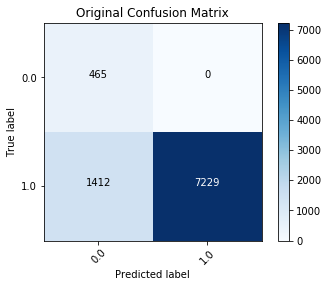

In [76]:
#Confusion Matrix graphic

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.
#Add title and Axis Labels
plt.title('Original Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for  i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text( j,i,  cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [77]:
# Residueles and Confusion Matrix look biased so we will use Synthetic Minority Oversampling Techinque SMOTE()
sm = SMOTE()
X, y = sm.fit_sample(X, y)

r = np.ravel(y)
y= r
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

residuals = np.abs(y_train - y_hat_train)

cnf_matrix = confusion_matrix(y_hat_test, y_test)

print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))
print('Confusion Matrix:\n',cnf_matrix)

0.0    29086
1.0    14372
dtype: int64
0.0    0.66929
1.0    0.33071
dtype: float64
Confusion Matrix:
 [[4393 1968]
 [2859 5266]]


In [102]:
#Logistic Regression Declaration  
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
logreg

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

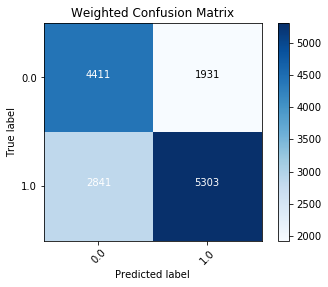

In [115]:
#SMOTE Confusion Matrix graphic

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.
#Add title and Axis Labels
plt.title('Weighted Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

/Users/edbeck/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.7615307441524907


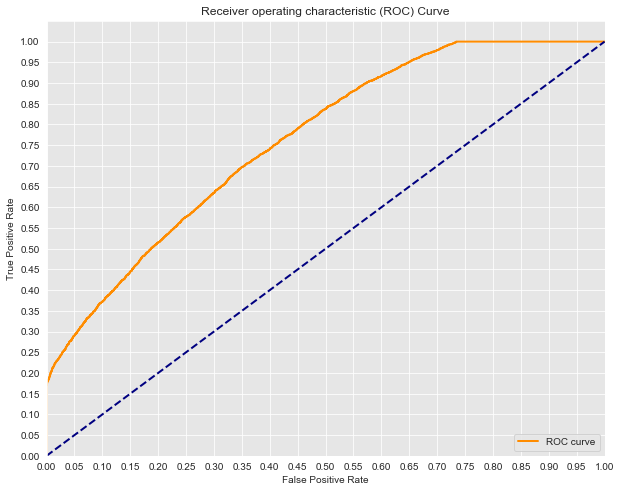

In [116]:
#Receiver Operater Characteristic Curve
#Rate of False Positives vs False Negatives

#Find the probability of test points
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

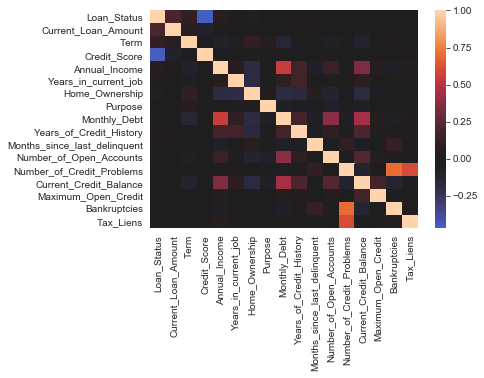

In [117]:
#Multicollineararity 
sns.heatmap(df.corr(), center=0);

In [118]:
#Baseline Decision Tree Model
classifier = DecisionTreeClassifier(random_state=10, criterion = 'entropy')  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [119]:
# Make predictions for test data
y_pred = classifier.predict(X_test) 

In [120]:
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

residuals = np.abs(y_train - y_hat_train)

cnf_matrix = confusion_matrix(y_hat_test, y_test)

print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))
print('Confusion Matrix:\n',cnf_matrix)

Accuracy is :85.5239541626398

AUC is :0.86
0.0    29194
1.0    14264
dtype: int64
0.0    0.671775
1.0    0.328225
dtype: float64
Confusion Matrix:
 [[4411 1931]
 [2841 5303]]


![](https://raw.githubusercontent.com/Edward-Beck/dsc-3-final-project-online-ds-pt-100118/master/pictures/Hyperparameter_Tuning.png )

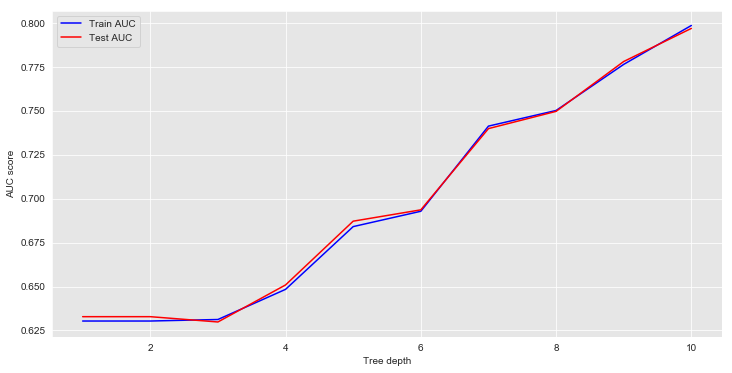

In [121]:
#Optimal Max Depth is 8 
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

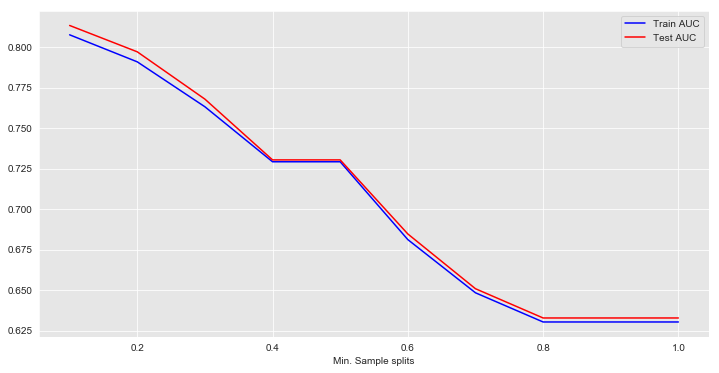

In [122]:
# Identify the optimal min-samples-split for given data
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   tree2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
   tree2.fit(X_train, y_train)
   train_pred = tree2.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = tree2.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

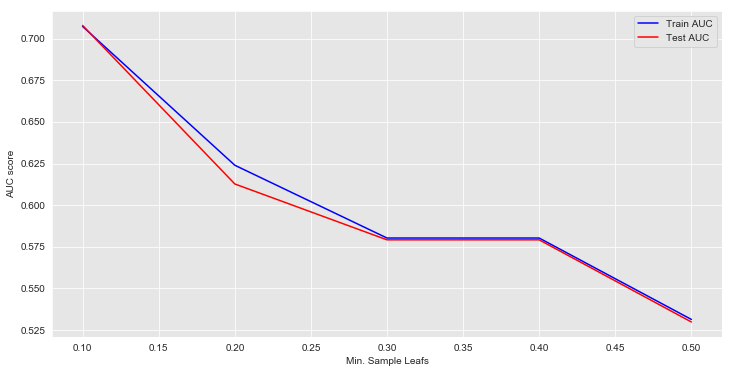

In [123]:
# Optimizing for the miniumum sample per leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    

plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()    

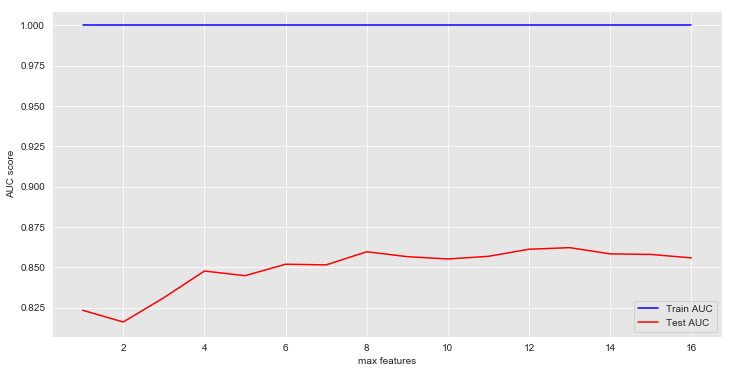

In [124]:
# Find the best value for optimal maximum feature size
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()    

In [125]:
# Train a classifier with optimal values identified above
# Parameter tuning has resulted in a decrease in Area Under the Curve as well as a decreased the Accuracy...Winning!
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=9,
                           max_depth=19,
                           min_samples_split=0.1,
                           min_samples_leaf=0.1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))



Accuracy is :71.26881126604998

AUC is :0.71


![](https://raw.githubusercontent.com/Edward-Beck/dsc-3-final-project-online-ds-pt-100118/master/pictures/Decision_Tree_Classifiers.png)

In [126]:
#Decision Tree with Gini criteria, Precision, Recall, F1-Score 
sm = SMOTE()
X, y = sm.fit_sample(X, y)
r = np.ravel(y)
y= r
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(X_train, y_train)
#y_pred =tree_clf.predict(X_test)
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))
print(classification_report(y_test, pred))

[[6530  722]
 [3741 3493]]
Testing Accuracy for Decision Tree Classifier: 69.19%
              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75      7252
         1.0       0.83      0.48      0.61      7234

   micro avg       0.69      0.69      0.69     14486
   macro avg       0.73      0.69      0.68     14486
weighted avg       0.73      0.69      0.68     14486



In [127]:
#Decision Tree Estimator, takes multiple subsets of each feature to evaluate which trees should be utilized for modeling 
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train, y_train)
train = bagged_tree.score(X_train, y_train)
test = bagged_tree.score(X_test, y_test)
print(f'(train : {train}, test :{test})')

(train : 0.7372635648212067, test :0.7351925997514842)


In [128]:
#Bagging Classifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train, y_train)
pred = bagged_tree.predict(X_test)
print(confusion_matrix(y_test, pred))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))
print(classification_report(y_test, pred))

[[5859 1393]
 [2452 4782]]
Testing Accuracy for Decision Tree Classifier: 73.46%
              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75      7252
         1.0       0.77      0.66      0.71      7234

   micro avg       0.73      0.73      0.73     14486
   macro avg       0.74      0.73      0.73     14486
weighted avg       0.74      0.73      0.73     14486



In [4]:
# Random Forest Classifier Declaration
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [129]:
#Random Forest
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
train = forest.score(X_train, y_train)
test = forest.score(X_test, y_test)
print(f'(train : {train}, test :{test})')

(train : 0.7700768558148097, test :0.7683970730360348)


In [130]:
# Cross Validation of Log Regression Baseline Model
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X_train)
logreg = LogisticRegression(fit_intercept = False, C = 1e15)
log_reg_cv_score = cross_val_score(logreg, scaled_df, y_train, cv=3)
mean_log_reg_cv_score = np.mean(log_reg_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_log_reg_cv_score * 100))



/Users/edbeck/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/edbeck/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/edbeck/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Mean Cross Validation Score: 67.08%


In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier()
gbt_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [131]:
#Gradient Boosting
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.head()
target = df['Loan_Status']
scaled_df =scaled_df.drop(['Loan_Status'], axis = 1)

sm = SMOTE()
scaled_df, target = sm.fit_sample(scaled_df, target)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.20)

gbt_clf = GradientBoostingClassifier()
gbt_clf.fit(X_train, y_train)
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")

print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')


Training Metrics
Model: Gradient Boosted Trees
Accuracy: 0.8913170100312804
F1-Score: 0.900803339371505

Testing Metrics

Model: Gradient Boosted Trees
Accuracy: 0.8907584778669428
F1-Score: 0.9000473709142587


In [132]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
print('Confusion')
print(gbt_confusion_matrix)
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, scaled_df, target, cv=5).mean())

Confusion
[[4623 1157]
 [ 109 5700]]
              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88      5780
         1.0       0.83      0.98      0.90      5809

   micro avg       0.89      0.89      0.89     11589
   macro avg       0.90      0.89      0.89     11589
weighted avg       0.90      0.89      0.89     11589

Mean GBT Cross-Val Score (k=5):
0.8819639131611856


![](https://raw.githubusercontent.com/Edward-Beck/dsc-3-final-project-online-ds-pt-100118/master/pictures/XGBooost_ML.png)

In [6]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [145]:
#XGBOOST Results Before SMOTE 

y, X = dmatrices('Loan_Status ~ Credit_Score  + Years_in_current_job + Years_of_Credit_History + Current_Loan_Amount + Annual_Income + Monthly_Debt' ,
                  df, return_type = "dataframe")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)


param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 10  # The number of training iterations

bias_model = xgb.train(param, D_train, steps)
preds = bias_model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
print('Original Results')
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9209417235866879
Recall = 0.6353887399463807
Accuracy = 0.8506520247083047


In [19]:

import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score
y, X = dmatrices('Loan_Status ~ Credit_Score  + Years_in_current_job + Years_of_Credit_History + Current_Loan_Amount + Annual_Income + Monthly_Debt' ,
                  df, return_type = "dataframe")

sm = SMOTE()
scaled_df, target = sm.fit_sample(scaled_df, target)


X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.2)


D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)


param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 10  # The number of training iterations

unbias_model = xgb.train(param, D_train, steps)
preds = unbias_model.predict(D_test)

best_preds = np.asarray([np.argmax(line) for line in preds])
print('Unbias Results')
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
#Receiver Operater Characteristic Curve
#Rate of False Positives vs False Negatives

#Find the probability of test points
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Precision = 0.7073147887759021
Recall = 0.7060860516033224
Accuracy = 0.7058417464837345


In [91]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE 
y, X = dmatrices('Loan_Status ~ Credit_Score  + Years_in_current_job + Years_of_Credit_History + Current_Loan_Amount + Annual_Income + Monthly_Debt' ,
                  df, return_type = "dataframe")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)


param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 10  # The number of training iterations

bias_model = xgb.train(param, D_train, steps)

preds = bias_model.predict(D_test)

best_preds = np.asarray([np.argmax(line) for line in preds])
print(' ')
print('Original Results')
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
target = df['Loan_Status']
scaled_df =scaled_df.drop(['Loan_Status'], axis = 1)


y, X = dmatrices('Loan_Status ~ Credit_Score  + Years_in_current_job + Years_of_Credit_History + Current_Loan_Amount + Annual_Income + Monthly_Debt' ,
                  df, return_type = "dataframe")

sm = SMOTE()
scaled_df, target = sm.fit_sample(scaled_df, target)


X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.2)


D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)


param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 10  # The number of training iterations

unbias_model = xgb.train(param, D_train, steps)
preds = unbias_model.predict(D_test)

best_preds = np.asarray([np.argmax(line) for line in preds])
print(' ')
print('Unbias Results')
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

 
Original Results
Precision = 0.9215103638208436
Recall = 0.6313818924438394
Accuracy = 0.8513383665065203
 
Unbias Results
Precision = 0.7674208167614778
Recall = 0.7527038249728197
Accuracy = 0.7522650789541807


   
Importance Type : Weight
Importance Type : Gain
Importance Type : Cover


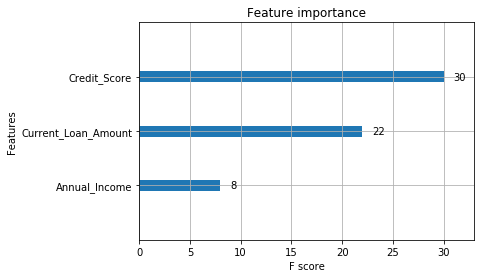

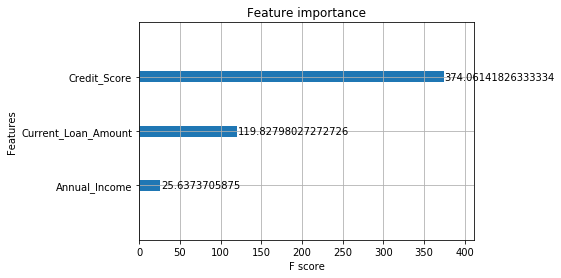

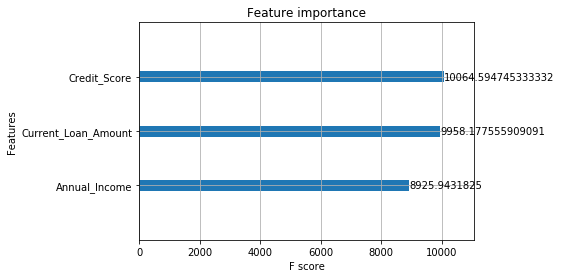

In [96]:


Weight ='Weight'
xgb.plot_importance(bias_model, label = Weight)

xgb.plot_importance(bias_model, importance_type = "gain", label= 'Gain')

xgb.plot_importance(bias_model, importance_type = "cover", label = 'Cover')
print ('   ')
print('Importance Type : Weight')
print('Importance Type : Gain')
print('Importance Type : Cover')

In [149]:
shap_df.head()

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
2,1.000,1.0,0.023,0.069,0.8,0.667,0.2,0.127,0.166,0.165,0.362,0.067,0.041,0.001,0.000,0.0
6,0.002,1.0,0.021,0.035,0.1,0.333,0.2,0.047,0.237,0.057,0.255,0.067,0.017,0.000,0.143,0.0
8,0.005,1.0,0.013,0.080,0.2,1.000,0.2,0.081,0.282,0.188,0.064,0.000,0.059,0.001,0.000,0.0
10,1.000,1.0,0.021,0.020,0.3,1.000,0.2,0.052,0.183,0.432,0.319,0.000,0.028,0.000,0.000,0.0
12,1.000,1.0,0.022,0.022,0.1,0.667,0.2,0.051,0.070,0.142,0.106,0.000,0.018,0.000,0.000,0.0


/Users/edbeck/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/edbeck/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


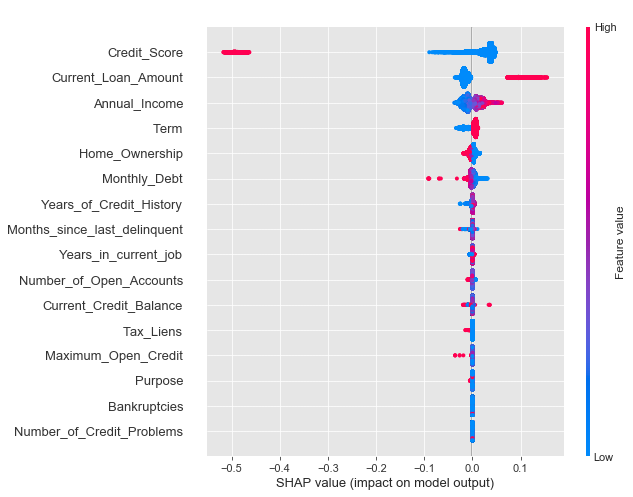

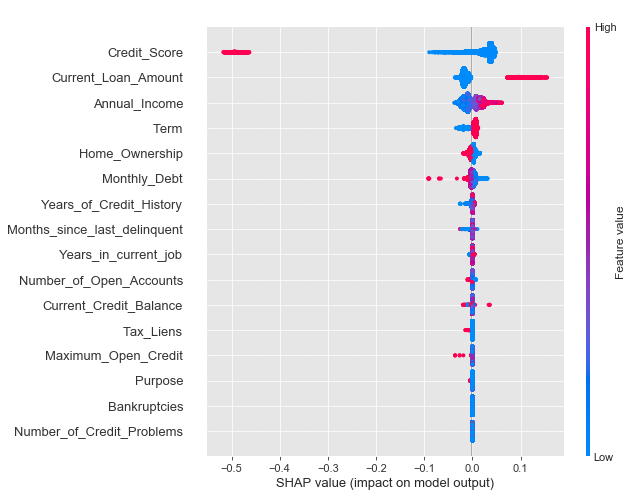

In [147]:
# explain the model's predictions using SHAP values
shap_df = df.drop(['Loan_Status'], axis = 1)
shap_target = df['Loan_Status']
shap_model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(shap_df, label=shap_target), 100)

explainer = shap.TreeExplainer(shap_model)
shap_values = explainer.shap_values(shap_df)
shap.summary_plot(shap_values, shap_df)

#shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, shap_df)
shap.summary_plot(shap_values, shap_df)

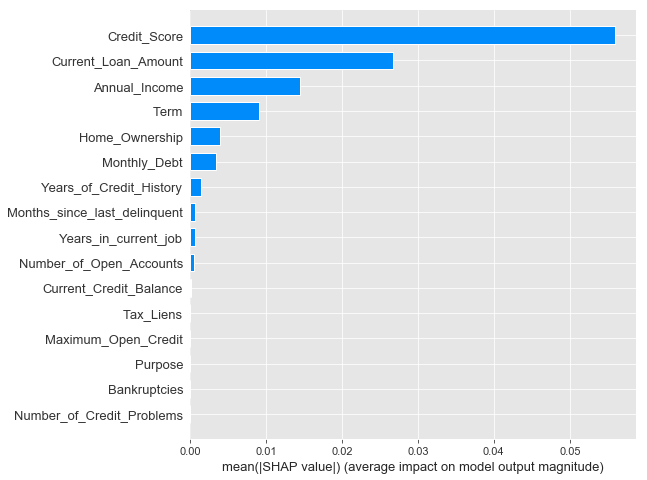

In [143]:
shap.summary_plot(shap_values, shap_df, plot_type="bar")

Precision = 0.9188466541407718
Recall = 0.6229012760241773
Accuracy = 0.8458476321207962
AUC: 0.730443658371652


/Users/edbeck/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/edbeck/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


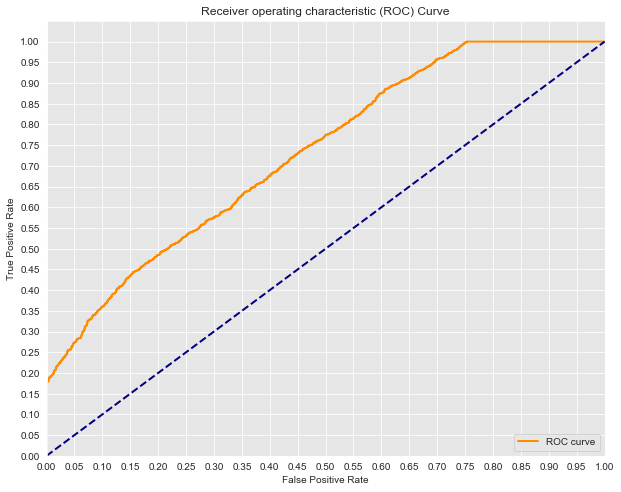

In [134]:
#XGBOOST Statisical Breakdown 
y, X = dmatrices('Loan_Status ~ Credit_Score  + Years_in_current_job + Years_of_Credit_History + Current_Loan_Amount + Annual_Income + Monthly_Debt' ,
                  df, return_type = "dataframe")




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)


param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 10  # The number of training iterations

model = xgb.train(param, D_train, steps)
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
#Receiver Operater Characteristic Curve
#Rate of False Positives vs False Negatives

#Find the probability of test points
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
#GridSearch CV
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, scaled_df, target, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dt_cv_score * 100))


dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,  3,  5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(scaled_df, target)

Mean Cross Validation Score: 80.88%


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, 5, 7, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [38]:
#Grid Search Results
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(scaled_df, target)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 73.8%
Mean Testing Score: 100.0%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [139]:
df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
2,1.0,1.000,1.0,0.023,0.069,0.8,0.667,0.2,0.127,0.166,0.165,0.362,0.067,0.041,0.001,0.000,0.0
6,1.0,0.002,1.0,0.021,0.035,0.1,0.333,0.2,0.047,0.237,0.057,0.255,0.067,0.017,0.000,0.143,0.0
8,1.0,0.005,1.0,0.013,0.080,0.2,1.000,0.2,0.081,0.282,0.188,0.064,0.000,0.059,0.001,0.000,0.0
10,1.0,1.000,1.0,0.021,0.020,0.3,1.000,0.2,0.052,0.183,0.432,0.319,0.000,0.028,0.000,0.000,0.0
12,1.0,1.000,1.0,0.022,0.022,0.1,0.667,0.2,0.051,0.070,0.142,0.106,0.000,0.018,0.000,0.000,0.0


In [45]:
np.sum(pca.explained_variance_ratio_)

0.7807419178270052

In [43]:
#Principal Component Analysis

df.columns
pca_df = df.drop(['Loan_Status'], axis = 1)
pca_target = df['Loan_Status']
pca_features = pca_df.columns
X = pca_df.loc[:,pca_features].values
y= pca_target.values
X = StandardScaler().fit_transform(X)
pd.DataFrame(data = X, columns = pca_features)

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
np.sum(pca.explained_variance_ratio_)

In [14]:
#K-Nearest-Neighbor

X = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']
y = preprocessing.LabelEncoder().fit_transform(y)
start = timeit.timeit()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Yhat = model.predict(X_test)
acc = metrics.accuracy_score(Yhat, Y_test)
end = timeit.timeit()
print("Accuracy:",acc)
print ("Time Taken:", end - start)


Accuracy: 0.762525737817433
Time Taken: -0.002934591961093247


In [17]:
#Pipeline Employing Principal Component Analysis, Logistic Regression,
#Support Vector Machine and Decision Trees

# Load and split the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.head()
target = df['Loan_Status']
scaled_df =scaled_df.drop(['Loan_Status'], axis = 1)

sm = SMOTE()
scaled_df, target = sm.fit_sample(scaled_df, target)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.20)


# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=8)), ('clf', LogisticRegression(random_state=42))])



pipe_svm = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=8)), ('clf', svm.SVC(random_state=42))])

pipe_dt = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=8)), ('clf', tree.DecisionTreeClassifier(random_state=42))])


# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_dt]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

# Save pipeline to file
joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
print('Saved %s pipeline to file' % pipe_dict[best_clf])



Logistic Regression pipeline test accuracy: 0.663
Support Vector Machine pipeline test accuracy: 0.676
Decision Tree pipeline test accuracy: 0.798
Classifier with best accuracy: Decision Tree
Saved Decision Tree pipeline to file


In [97]:
#KNN with SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
import timeit


X = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']
y = preprocessing.LabelEncoder().fit_transform(y)
start = timeit.timeit()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Yhat = model.predict(X_test)
acc = metrics.accuracy_score(Yhat, Y_test)
end = timeit.timeit()
print('K-Nearest-Neighbor')
print("Accuracy:",acc)

K-Nearest-Neighbor
Accuracy: 0.8256691832532601
